In [ ]:
##Does Olympic host country earn more medals?

In [7]:
import pandas as pd

# data source: https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data
editions = pd.read_csv('C:/Users/yiche/Desktop/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv', sep='\t')

In [5]:
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

print(editions.head())

   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden


In [8]:
ioc_codes = pd.read_csv('C:/Users/yiche/Desktop/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')

In [34]:
ioc_codes = ioc_codes[['Country', 'NOC']]

print(ioc_codes.loc[ioc_codes.NOC=='CHN'])

   Country  NOC
40   China  CHN


In [28]:
import pandas as pd
#columns = ['City', 'Edition', 'Sport', ' Discipline', 'Athlete', 'NOC', 'Gender', 'Event', 'Event_gender', 'Medal']
medals = pd.read_csv('C:/Users/yiche/Desktop/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.csv')
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]

print(medals)


                    Athlete  NOC   Medal  Edition
0             HAJOS, Alfred  HUN    Gold     1896
1          HERSCHMANN, Otto  AUT  Silver     1896
2         DRIVAS, Dimitrios  GRE  Bronze     1896
3        MALOKINIS, Ioannis  GRE    Gold     1896
4        CHASAPIS, Spiridon  GRE  Silver     1896
...                     ...  ...     ...      ...
29211        ENGLICH, Mirko  GER  Silver     2008
29212  MIZGAITIS, Mindaugas  LTU  Bronze     2008
29213       PATRIKEEV, Yuri  ARM  Bronze     2008
29214         LOPEZ, Mijain  CUB    Gold     2008
29215        BAROEV, Khasan  RUS  Silver     2008

[29216 rows x 4 columns]


In [30]:
medal_counts = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

print(medal_counts.head())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU  \
Edition                                                      ...             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...  NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...  NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...  NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]


In [31]:
totals = editions.set_index('Edition')

totals = totals['Grand Total']

fractions = medal_counts.divide(totals, axis='rows')

print(fractions.head())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

In [32]:
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

fractions_change = fractions_change.reset_index()

print(fractions_change.head())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC  ...  URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0    ...  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1    ...  NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2    ...  NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3    ...  NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4    ...  NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]


In [33]:
hosts = pd.merge(editions, ioc_codes, on='Country', how='left')

hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

hosts = hosts.reset_index()

print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


In [35]:
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

print(reshaped.shape, fractions_change.shape)

chn = reshaped.loc[reshaped.NOC=='CHN']

print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


In [36]:
merged = pd.merge(reshaped, hosts, how='inner', on=['Edition','NOC'])

influence = merged.set_index('Edition').sort_index()

print(influence.head())

         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


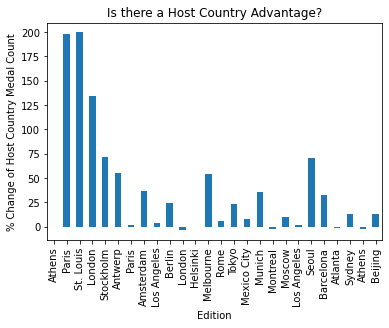

In [37]:
import matplotlib.pyplot as plt

change = influence['Change']

ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

plt.show()